In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/content/advertising (1).csv")

In [3]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


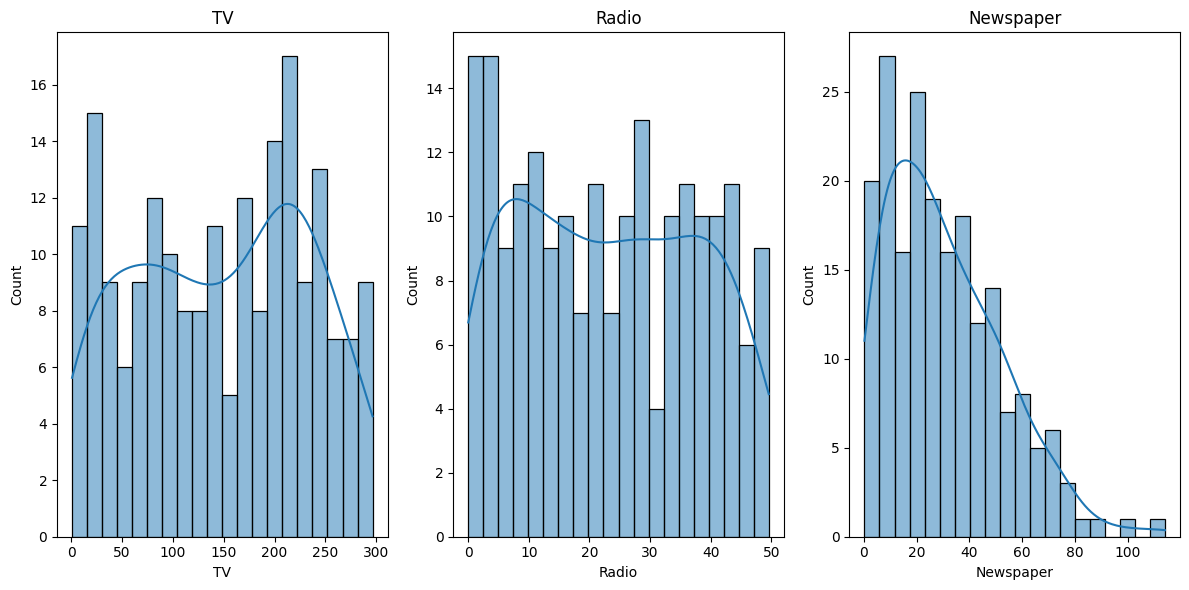

In [7]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

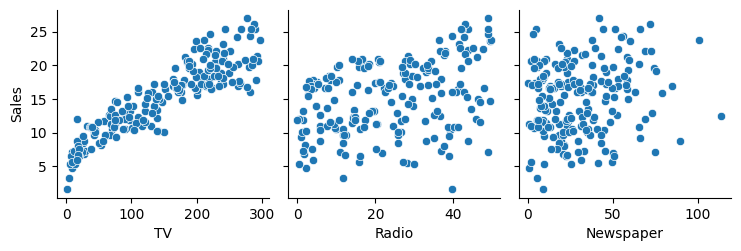

In [8]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

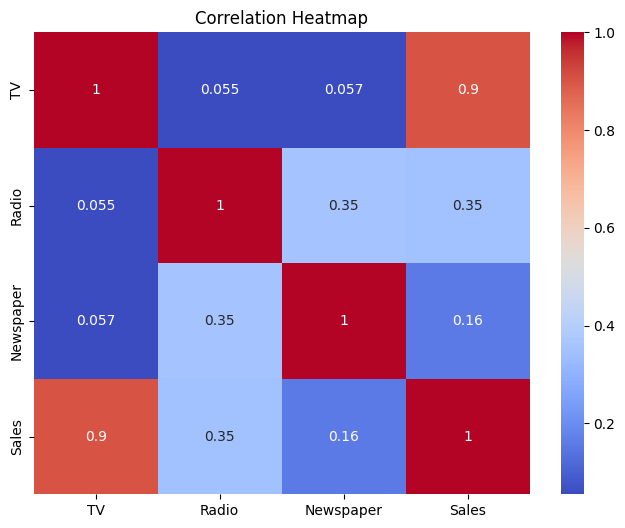

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap')
plt.show()

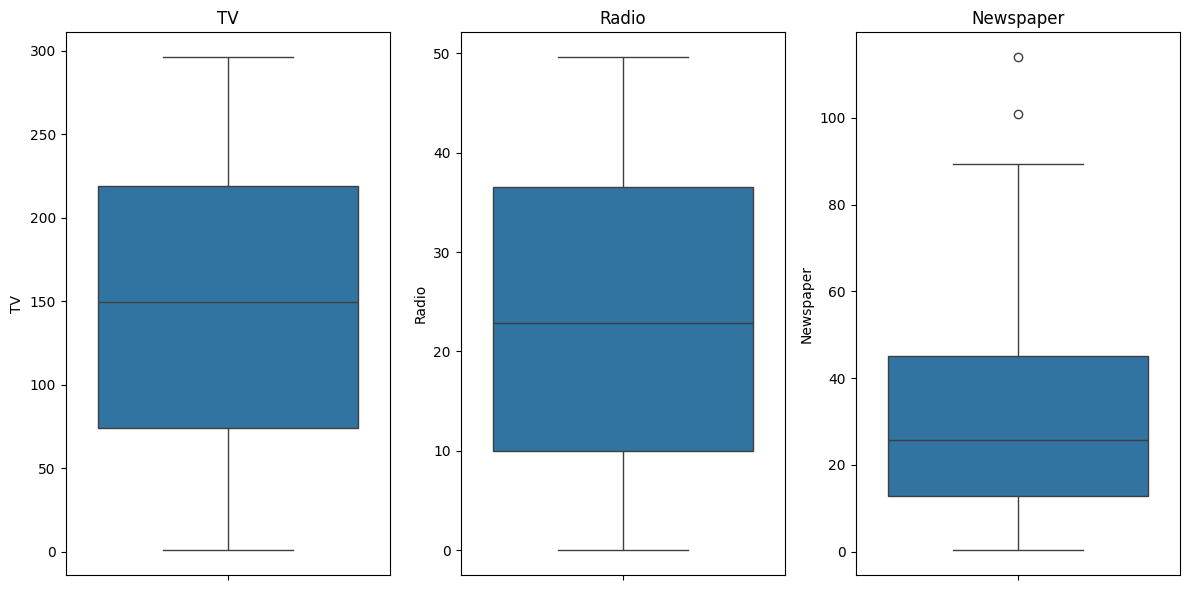

In [10]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [11]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("\nLinear Regression Model Evaluation:")
evaluate_model(lr_model, X_test_scaled, y_test)


Linear Regression Model Evaluation:
Mean Absolute Error: 1.2748262109549349
Mean Squared Error: 2.9077569102710927
Root Mean Squared Error: 1.7052146229349234


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("\nRandom Forest Regression Model Evaluation:")
evaluate_model(rf_model, X_test_scaled, y_test)


Random Forest Regression Model Evaluation:
Mean Absolute Error: 0.9171499999999992
Mean Squared Error: 1.4368395500000006
Root Mean Squared Error: 1.1986824224956336
